In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('world_project_data.csv',)

## part 1 - analysis on scraped world project data

In [3]:
data.head()

,Unnamed: 0,project_title,Country,project_id,commitment_amount,status,Approval_date,last_updated_date
0,0,Primary Health Care Investment Program,Ghana,P173168,150.0,Active,"June 10, 2022","May 18, 2022"
1,1,Costa Rica COVID-19 Vaccines Project,Costa Rica,P178320,120.0,Active,"June 10, 2022","May 17, 2022"
2,2,Rail Logistics Project,India,P177856,245.0,Active,"June 10, 2022","May 18, 2022"
3,3,PFM for Service Delivery Program,Ghana,P176445,150.0,Active,"June 10, 2022","May 18, 2022"
4,4,Guyana Strengthening Human Capital through Edu...,Guyana,P177741,44.0,Active,"June 10, 2022","May 23, 2022"


In [5]:
data.columns

Index(['Unnamed: 0', 'project_title', 'Country', 'project_id',
       'commitment_amount', 'status', 'Approval_date', 'last_updated_date'],
      dtype='object')

In [7]:
df = data[['project_title', 'Country', 'project_id',
       'commitment_amount', 'status', 'Approval_date', 'last_updated_date']]

In [8]:
df.head()

,project_title,Country,project_id,commitment_amount,status,Approval_date,last_updated_date
0,Primary Health Care Investment Program,Ghana,P173168,150.0,Active,"June 10, 2022","May 18, 2022"
1,Costa Rica COVID-19 Vaccines Project,Costa Rica,P178320,120.0,Active,"June 10, 2022","May 17, 2022"
2,Rail Logistics Project,India,P177856,245.0,Active,"June 10, 2022","May 18, 2022"
3,PFM for Service Delivery Program,Ghana,P176445,150.0,Active,"June 10, 2022","May 18, 2022"
4,Guyana Strengthening Human Capital through Edu...,Guyana,P177741,44.0,Active,"June 10, 2022","May 23, 2022"


In [9]:
# names of the countries
df['Country'].unique()

array(['Ghana', 'Costa Rica', 'India', 'Guyana', 'Indonesia',
       'St Maarten', 'Eastern and Southern Africa', 'Tonga',
       'Solomon Islands', 'Pakistan', 'Gambia, The', 'West Bank and Gaza',
       'Ukraine', 'Chad', 'Central Asia', 'Mongolia', 'South Sudan',
       'Marshall Islands', 'Somalia', 'Central African Republic',
       'Dominica', 'Middle East and North Africa', 'Sierra Leone',
       'Afghanistan', 'Senegal', 'Congo, Republic of', 'Nepal',
       'Cameroon', 'Moldova', 'Maldives', 'Samoa', 'Uganda',
       'Dominican Republic', 'Ethiopia', 'Argentina', 'Mexico',
       'Cabo Verde', 'Congo, Democratic Republic of', 'Bangladesh',
       'Comoros', 'Djibouti', 'Ecuador', 'Haiti', 'Türkiye', 'Grenada',
       'Cambodia', 'Kiribati', 'Madagascar', 'Timor-Leste', 'Malawi',
       'Tunisia', 'Uzbekistan', 'Tanzania', 'Morocco', 'Fiji', 'Armenia',
       'Western and Central Africa', "Cote d'Ivoire", 'Lebanon',
       "Lao People's Democratic Republic", 'Liberia', 'OECS Co

In [34]:
cols = df['Country'].unique()

In [10]:
len(df['Country'].unique())

208

In [11]:
# checking the country with the maximum projects
df['Country'].value_counts()

India                       800
Indonesia                   560
Brazil                      537
China                       531
Pakistan                    440
                           ... 
Antigua and Barbuda           1
Libya                         1
American Samoa                1
Red Sea and Gulf of Aden      1
Malta                         1
Name: Country, Length: 207, dtype: int64

In [12]:
df['Country'].value_counts().sort_values()

Malta                       1
Mercosur                    1
EU Accession Countries      1
France                      1
South East Asia             1
                         ... 
Pakistan                  440
China                     531
Brazil                    537
Indonesia                 560
India                     800
Name: Country, Length: 207, dtype: int64

In [24]:
num_of_projects = df['Country'].value_counts().sort_values(ascending=False)

In [27]:
num_of_projects.index[:20]

Index(['India', 'Indonesia', 'Brazil', 'China', 'Pakistan', 'Bangladesh',
       'Philippines', 'Mexico', 'Vietnam', 'Colombia', 'Tanzania', 'Kenya',
       'Ghana', 'Türkiye', 'Nigeria', 'Morocco', 'Argentina', 'Ethiopia',
       'Uganda', 'Yemen, Republic of'],
      dtype='object')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'India'),
  Text(1, 0, 'Indonesia'),
  Text(2, 0, 'Brazil'),
  Text(3, 0, 'China'),
  Text(4, 0, 'Pakistan'),
  Text(5, 0, 'Bangladesh'),
  Text(6, 0, 'Philippines'),
  Text(7, 0, 'Mexico'),
  Text(8, 0, 'Vietnam'),
  Text(9, 0, 'Colombia'),
  Text(10, 0, 'Tanzania'),
  Text(11, 0, 'Kenya'),
  Text(12, 0, 'Ghana'),
  Text(13, 0, 'Türkiye'),
  Text(14, 0, 'Nigeria'),
  Text(15, 0, 'Morocco'),
  Text(16, 0, 'Argentina'),
  Text(17, 0, 'Ethiopia'),
  Text(18, 0, 'Uganda'),
  Text(19, 0, 'Yemen, Republic of')])

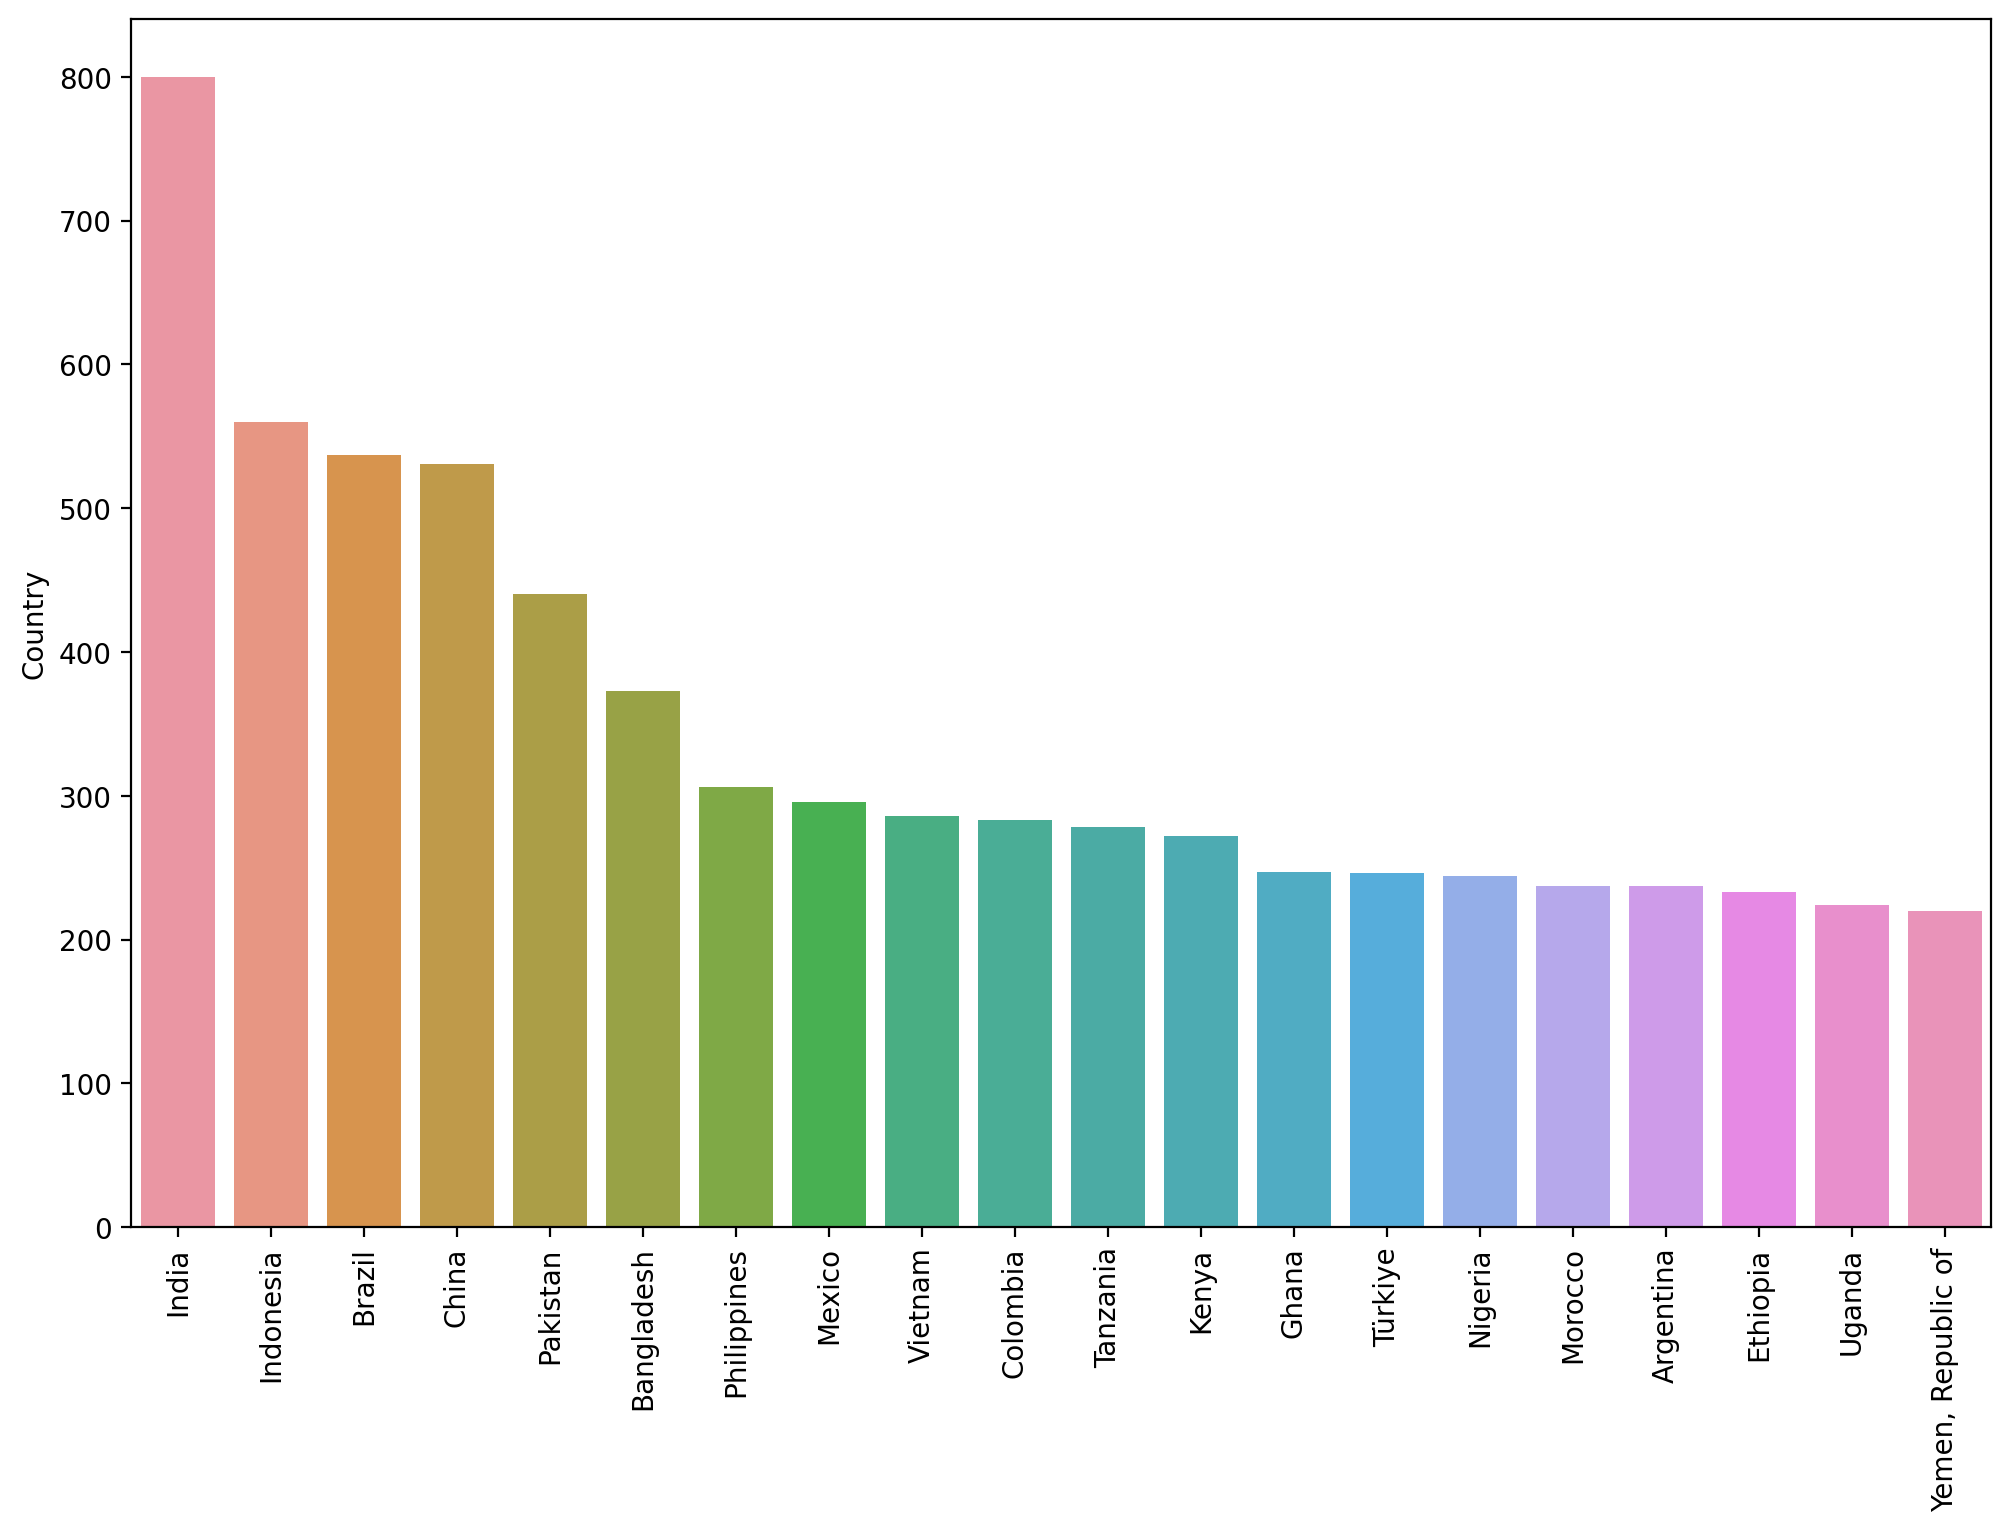

In [25]:
# first 20 countries with the highest number of projects
plt.figure(figsize =(12,8),dpi=200)
sns.barplot( x=num_of_projects.index[:20],y= df['Country'].value_counts().sort_values(ascending=False)[:20] )
plt.xticks(rotation=90)

In [28]:
data['status'].unique()

array(['Active', 'Closed', nan, 'Pipeline', 'Dropped'], dtype=object)

In [29]:
data['status'].fillna('not specified',inplace=True)

In [30]:
data['status'].value_counts()

Closed           13862
Active            2996
Dropped           1448
Pipeline           892
not specified        5
Name: status, dtype: int64

In [42]:
# mean of the commitment amount of projects having active status
data[data['status']=='Active']['commitment_amount'].mean()

108.10755674232315

In [45]:
# mean of the commitment amount of projects having Closed status
data[data['status']=='Closed']['commitment_amount'].mean()

60.00774202856734

### There are 13862 closed cases , 2996 active cases, 1448 dropped cases and 892 cases in pipeline state

In [39]:
# checking the number of active and closed cases in each country
for i in cols:
    print(i, 'Active : ',len(data[(data['Country']==i)& (data['status']=='Active')]),' Closed : ',
         len(data[(data['Country']==i)& (data['status']=='Closed')]))

Ghana Active :  43  Closed :  180
Costa Rica Active :  6  Closed :  57
India Active :  106  Closed :  563
Guyana Active :  10  Closed :  43
Indonesia Active :  58  Closed :  436
St Maarten Active :  12  Closed :  1
Eastern and Southern Africa Active :  47  Closed :  28
Tonga Active :  16  Closed :  20
Solomon Islands Active :  22  Closed :  25
Pakistan Active :  75  Closed :  304
Gambia, The Active :  19  Closed :  48
West Bank and Gaza Active :  44  Closed :  98
Ukraine Active :  22  Closed :  69
Chad Active :  22  Closed :  67
Central Asia Active :  12  Closed :  7
Mongolia Active :  23  Closed :  64
South Sudan Active :  13  Closed :  33
Marshall Islands Active :  12  Closed :  5
Somalia Active :  28  Closed :  62
Central African Republic Active :  26  Closed :  53
Dominica Active :  8  Closed :  9
Middle East and North Africa Active :  2  Closed :  10
Sierra Leone Active :  33  Closed :  95
Afghanistan Active :  41  Closed :  144
Senegal Active :  35  Closed :  153
Congo, Republic 

# part 2 - analysis on the second global projects dataset

In [40]:
df= pd.read_excel('World_Bank_Projects_downloaded_6_13_2022.xls')

In [41]:
df.columns = df.iloc[0]
df.drop(df.index[[0,1]],inplace =True)

In [43]:
df.head()

,Project ID,Region,Country,Project Status,Last Stage Reached Name,Project Name,Project Development Objective,Implementing Agency,Consultant Services Required,Project URL,...,Grant Amount,Borrower,Lending Instrument,Environmental Assessment Category,Environmental and Social Risk,Sector 1,Sector 2,Sector 3,Theme 1,Theme 2
2,P252350,Eastern and Southern Africa,Republic of Rwanda,Active,Bank Approved,Rwanda Priority Skills for Growth (PSG),The Program Development Objective is to expand...,Ministry Of Education,NaN,http://projects.worldbank.org/P252350/null?lan...,...,0,Ministry of Finance and Economic Planning,Program-for-Results Financing,NaN,NaN,Public Administration - Education,Tertiary Education,Workforce Development and Vocational Education,Education for the knowledge economy,NaN
3,P252338,East Asia and Pacific,Democratic Republic of Timor-Leste,Active,Bank Approved,Road Climate Resilience Project Second Additio...,The project will deliver sustainable climate r...,"Ministry of Public Works, Transport, and Commu...",NaN,http://projects.worldbank.org/P252338/null?lan...,...,0,Ministry of Finance,Investment Project Financing,B,NaN,Public Administration - Transportation,Rural and Inter-Urban Roads,NaN,NaN,NaN
4,P252337,Eastern and Southern Africa,Republic of Kenya,Dropped,Concept Review,Kenya Devolution and Service Delivery,To improve citizen and government access to co...,Kenya National Bureau of Statistics,NaN,http://projects.worldbank.org/P252337/null?lan...,...,340000,Kenya National Bureau of Statistics,Investment Project Financing,C,NaN,NaN,NaN,NaN,"Public expenditure, financial management and p...",Decentralization
5,P179254,Western and Central Africa,Republic of Cameroon,Pipeline,NaN,Cameroon Health System Strengthening Project,To increase utilization and quality of reprodu...,NaN,NaN,http://projects.worldbank.org/P179254/null?lan...,...,0,NaN,Investment Project Financing,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,P179238,Western and Central Africa,Republic of Chad,Pipeline,NaN,Chad Agribusiness and Rural Transformation Pro...,"The project Development Objective (PDO) is ""to...",NaN,NaN,http://projects.worldbank.org/P179238/null?lan...,...,0,NaN,Investment Project Financing,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
df.columns

Index(['Project ID', 'Region', 'Country', 'Project Status',
       'Last Stage Reached Name', 'Project Name',
       'Project Development Objective ', 'Implementing Agency',
       'Consultant Services Required', 'Project URL', 'Board Approval Date',
       'Project Closing Date', 'Financing Type', 'Current Project Cost',
       'IBRD Commitment ', 'IDA Commitment', 'Total IDA and IBRD Commitment',
       'Grant Amount', 'Borrower', 'Lending Instrument',
       'Environmental Assessment Category', 'Environmental and Social Risk',
       'Sector 1', 'Sector 2', 'Sector 3', 'Theme 1', 'Theme 2'],
      dtype='object', name=0)

In [50]:
df['Grant Amount'].fillna('0',inplace=True)
df['Total IDA and IBRD Commitment'].fillna('0',inplace=True)
df['IBRD Commitment '].fillna('0',inplace=True)
df['Current Project Cost'].fillna('0',inplace=True)
df['IDA Commitment'].fillna('0',inplace=True)

In [51]:
df[['Grant Amount','Total IDA and IBRD Commitment','IBRD Commitment ','Current Project Cost','IDA Commitment']] = df[['Grant Amount','Total IDA and IBRD Commitment','IBRD Commitment ','Current Project Cost','IDA Commitment']].astype(int)

## statistics of numerical data in the dataset

In [54]:
df.describe()

,Current Project Cost,IBRD Commitment,IDA Commitment,Total IDA and IBRD Commitment,Grant Amount
count,2.154300e+04,2.154300e+04,2.154300e+04,2.154300e+04,2.154300e+04
mean,2.272625e+08,4.527161e+07,2.748535e+07,7.275697e+07,1.931961e+06
std,1.047889e+10,1.228060e+08,7.017955e+07,1.341696e+08,3.921082e+07
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,9.700000e+06,0.000000e+00,0.000000e+00,5.000000e+06,0.000000e+00
50%,3.200000e+07,0.000000e+00,0.000000e+00,2.500000e+07,0.000000e+00
75%,1.004000e+08,3.130000e+07,2.200000e+07,8.400000e+07,0.000000e+00
max,1.530250e+12,3.750000e+09,1.375000e+09,3.750000e+09,5.330000e+09


# Bar plot representing the missing values present in each column

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, 'Environmental and Social Risk'),
  Text(1, 0, 'Consultant Services Required'),
  Text(2, 0, 'Borrower'),
  Text(3, 0, 'Implementing Agency'),
  Text(4, 0, 'Sector 3'),
  Text(5, 0, 'Theme 2'),
  Text(6, 0, 'Sector 2'),
  Text(7, 0, 'Project Development Objective '),
  Text(8, 0, 'Theme 1'),
  Text(9, 0, 'Financing Type'),
  Text(10, 0, 'Environmental Assessment Category'),
  Text(11, 0, 'Last Stage Reached Name'),
  Text(12, 0, 'Project Closing Date'),
  Text(13, 0, 'Board Approval Date'),
  Text(14, 0, 'Sector 1'),
  Text(15, 0, 'Lending Instrument'),
  Text(16, 0, 'Project Status'),
  Text(17, 0, 'Region'),
  Text(18, 0, 'Country'),
  Text(19, 0, 'Project URL'),
  Text(20, 0, 'Project Name'),
  Text(21, 0, 'Project ID'),
  Text(22, 0, 'Grant Amount'),
  Text(23, 0, 'Total IDA and IBRD Commitment'),
  Text(24, 0, 'IDA Commitment'),
  Text(25, 0, '

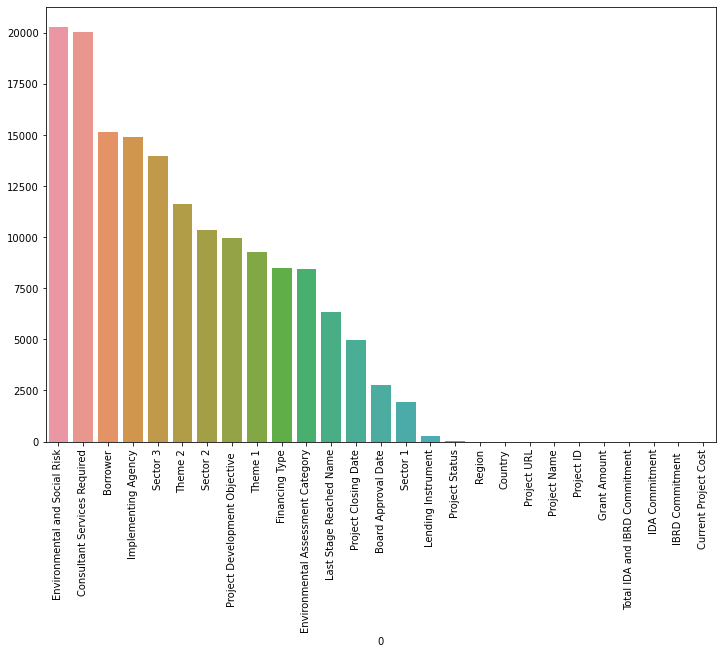

In [99]:
plt.figure(figsize=(12,8))
sns.barplot(x= df.isnull().sum().sort_values(ascending=False).index , y = df.isnull().sum().sort_values(ascending=False))
plt.xticks(rotation=90)

In [62]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,,,,,,,,
Current Project Cost,21543.0,2.272625e+08,1.047889e+10,0.0,9700000.0,32000000.0,100400000.0,1.530250e+12
IBRD Commitment,21543.0,4.527161e+07,1.228060e+08,0.0,0.0,0.0,31300000.0,3.750000e+09
IDA Commitment,21543.0,2.748535e+07,7.017955e+07,0.0,0.0,0.0,22000000.0,1.375000e+09
Total IDA and IBRD Commitment,21543.0,7.275697e+07,1.341696e+08,0.0,5000000.0,25000000.0,84000000.0,3.750000e+09
Grant Amount,21543.0,1.931961e+06,3.921082e+07,0.0,0.0,0.0,0.0,5.330000e+09


# factorplot on the mean of numerical data

/Users/isita/Downloads/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Current Project Cost'),
  Text(1, 0, 'IBRD Commitment '),
  Text(2, 0, 'IDA Commitment'),
  Text(3, 0, 'Total IDA and IBRD Commitment'),
  Text(4, 0, 'Grant Amount')])

<Figure size 864x576 with 0 Axes>

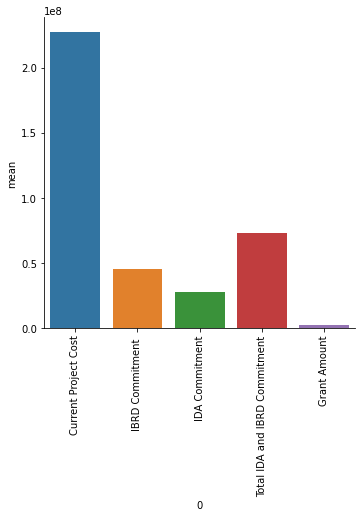

In [65]:
plt.figure(figsize=(12,8))
sns.factorplot(x= df.describe().transpose().index, y= 'mean', data= df.describe().transpose(), kind='bar', legend='True')
plt.xticks(rotation=90)

In [72]:
df['Region'].unique()

array(['Eastern and Southern Africa', 'East Asia and Pacific',
       'Western and Central Africa', 'South Asia',
       'Europe and Central Asia', 'Latin America and Caribbean',
       'Middle East and North Africa', 'Other', 'Africa', 'Africa West',
       nan, 'Africa East'], dtype=object)

In [76]:
df['Last Stage Reached Name'].unique()

array(['Bank Approved', 'Concept Review', nan, 'Begin Negotiation',
       'Decision Meeting', 'Begin Appraisal'], dtype=object)

In [75]:
len(df[df['Last Stage Reached Name']=='Bank Approved'])

13494

In [77]:
for i in df['Last Stage Reached Name'].unique():
    print(len(df[df['Last Stage Reached Name']==i]), ' are ',i)

13494  are  Bank Approved
1153  are  Concept Review
0  are  nan
223  are  Begin Negotiation
124  are  Decision Meeting
202  are  Begin Appraisal


In [79]:
count =[]
stage =[]
for i in df['Last Stage Reached Name'].unique():
    count.append(len(df[df['Last Stage Reached Name']==i]))
    stage.append(i)

In [82]:
count_df = pd.DataFrame({'count':count,'stage':stage})

In [83]:
count_df

,count,stage
0,13494,Bank Approved
1,1153,Concept Review
2,0,NaN
3,223,Begin Negotiation
4,124,Decision Meeting
5,202,Begin Appraisal


# count plot on last date reached column

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Bank Approved'),
  Text(1, 0, 'Concept Review'),
  Text(2, 0, 'Begin Negotiation'),
  Text(3, 0, 'Decision Meeting'),
  Text(4, 0, 'Begin Appraisal')])

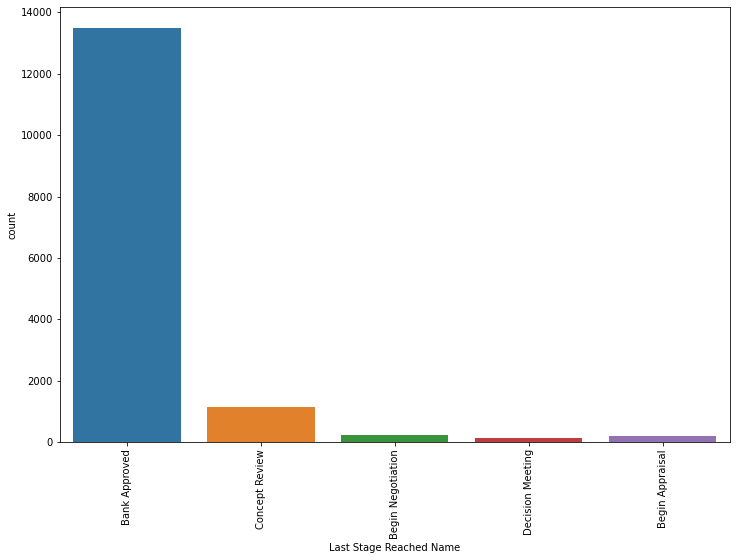

In [88]:
plt.figure(figsize=(12,8))
sns.countplot(x='Last Stage Reached Name',data=df)
plt.xticks(rotation=90)

In [87]:
df['Implementing Agency'].unique()

array(['Ministry Of Education',
       'Ministry of Public Works, Transport, and Communications',
       'Kenya National Bureau of Statistics', ...,
       "Ciments de L'Afrique de l'Ouest (CIMAO)",
       'GAMWORKS, Department of State for Health',
       'Ethiopian Roads Authority, Ministry of Transport RSVP, (former) Planning Commission / India Backbone Implementation Network'],
      dtype=object)

In [92]:
df['Implementing Agency'].value_counts().sort_values(ascending=False)

Ministry of Finance                                                                                                                                 227
Ministry of Health                                                                                                                                  165
Ministry of Education                                                                                                                                71
Ministry of Economy and Finance                                                                                                                      71
Ministry of Agriculture                                                                                                                              51
                                                                                                                                                   ... 
Agence des Travaux et de Gestion des Routes (AGEROUTE Senegal), Coordination du PATMUR, 

In [ ]:
df['Implementing Agency'].value_counts().sort_values(ascending=False)[:10]

# Bar plot on Implementing agency and the number of projects it handled.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Ministry of Finance'),
  Text(1, 0, 'Ministry of Health'),
  Text(2, 0, 'Ministry of Education'),
  Text(3, 0, 'Ministry of Economy and Finance'),
  Text(4, 0, 'Ministry of Agriculture'),
  Text(5, 0, 'Ministry of Environment'),
  Text(6, 0, 'Ministry of Public Health'),
  Text(7, 0, 'Ministry of Agriculture and Rural Development'),
  Text(8, 0, 'Ministry of Finance and Economic Development'),
  Text(9, 0, 'Ministry of Health and Population')])

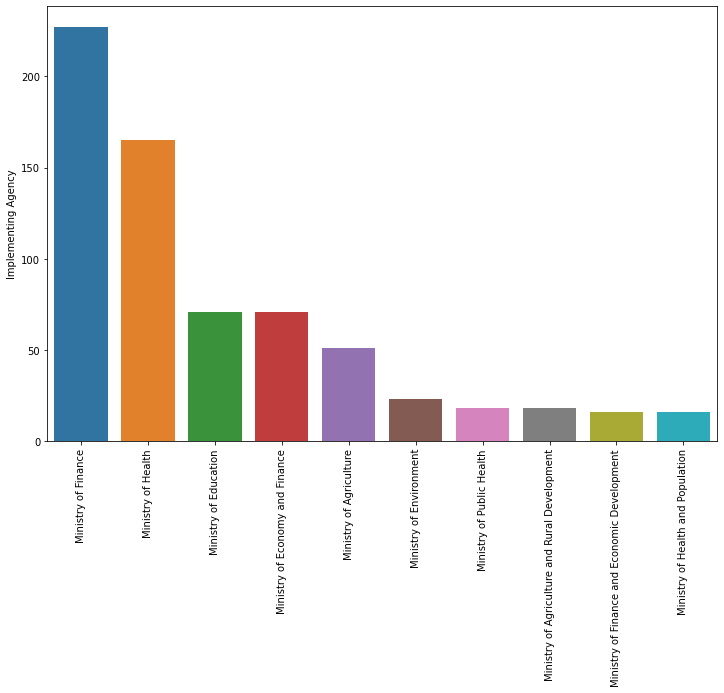

In [94]:
plt.figure(figsize=(12,8))
sns.barplot(x=df['Implementing Agency'].value_counts().sort_values(ascending=False)[:10].index
            ,y = df['Implementing Agency'].value_counts().sort_values(ascending=False)[:10])
plt.xticks(rotation=90)

# countplot on the region and it's project status

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Eastern and Southern Africa'),
  Text(1, 0, 'East Asia and Pacific'),
  Text(2, 0, 'Western and Central Africa'),
  Text(3, 0, 'South Asia'),
  Text(4, 0, 'Europe and Central Asia'),
  Text(5, 0, 'Latin America and Caribbean'),
  Text(6, 0, 'Middle East and North Africa'),
  Text(7, 0, 'Other'),
  Text(8, 0, 'Africa'),
  Text(9, 0, 'Africa West'),
  Text(10, 0, 'Africa East')])

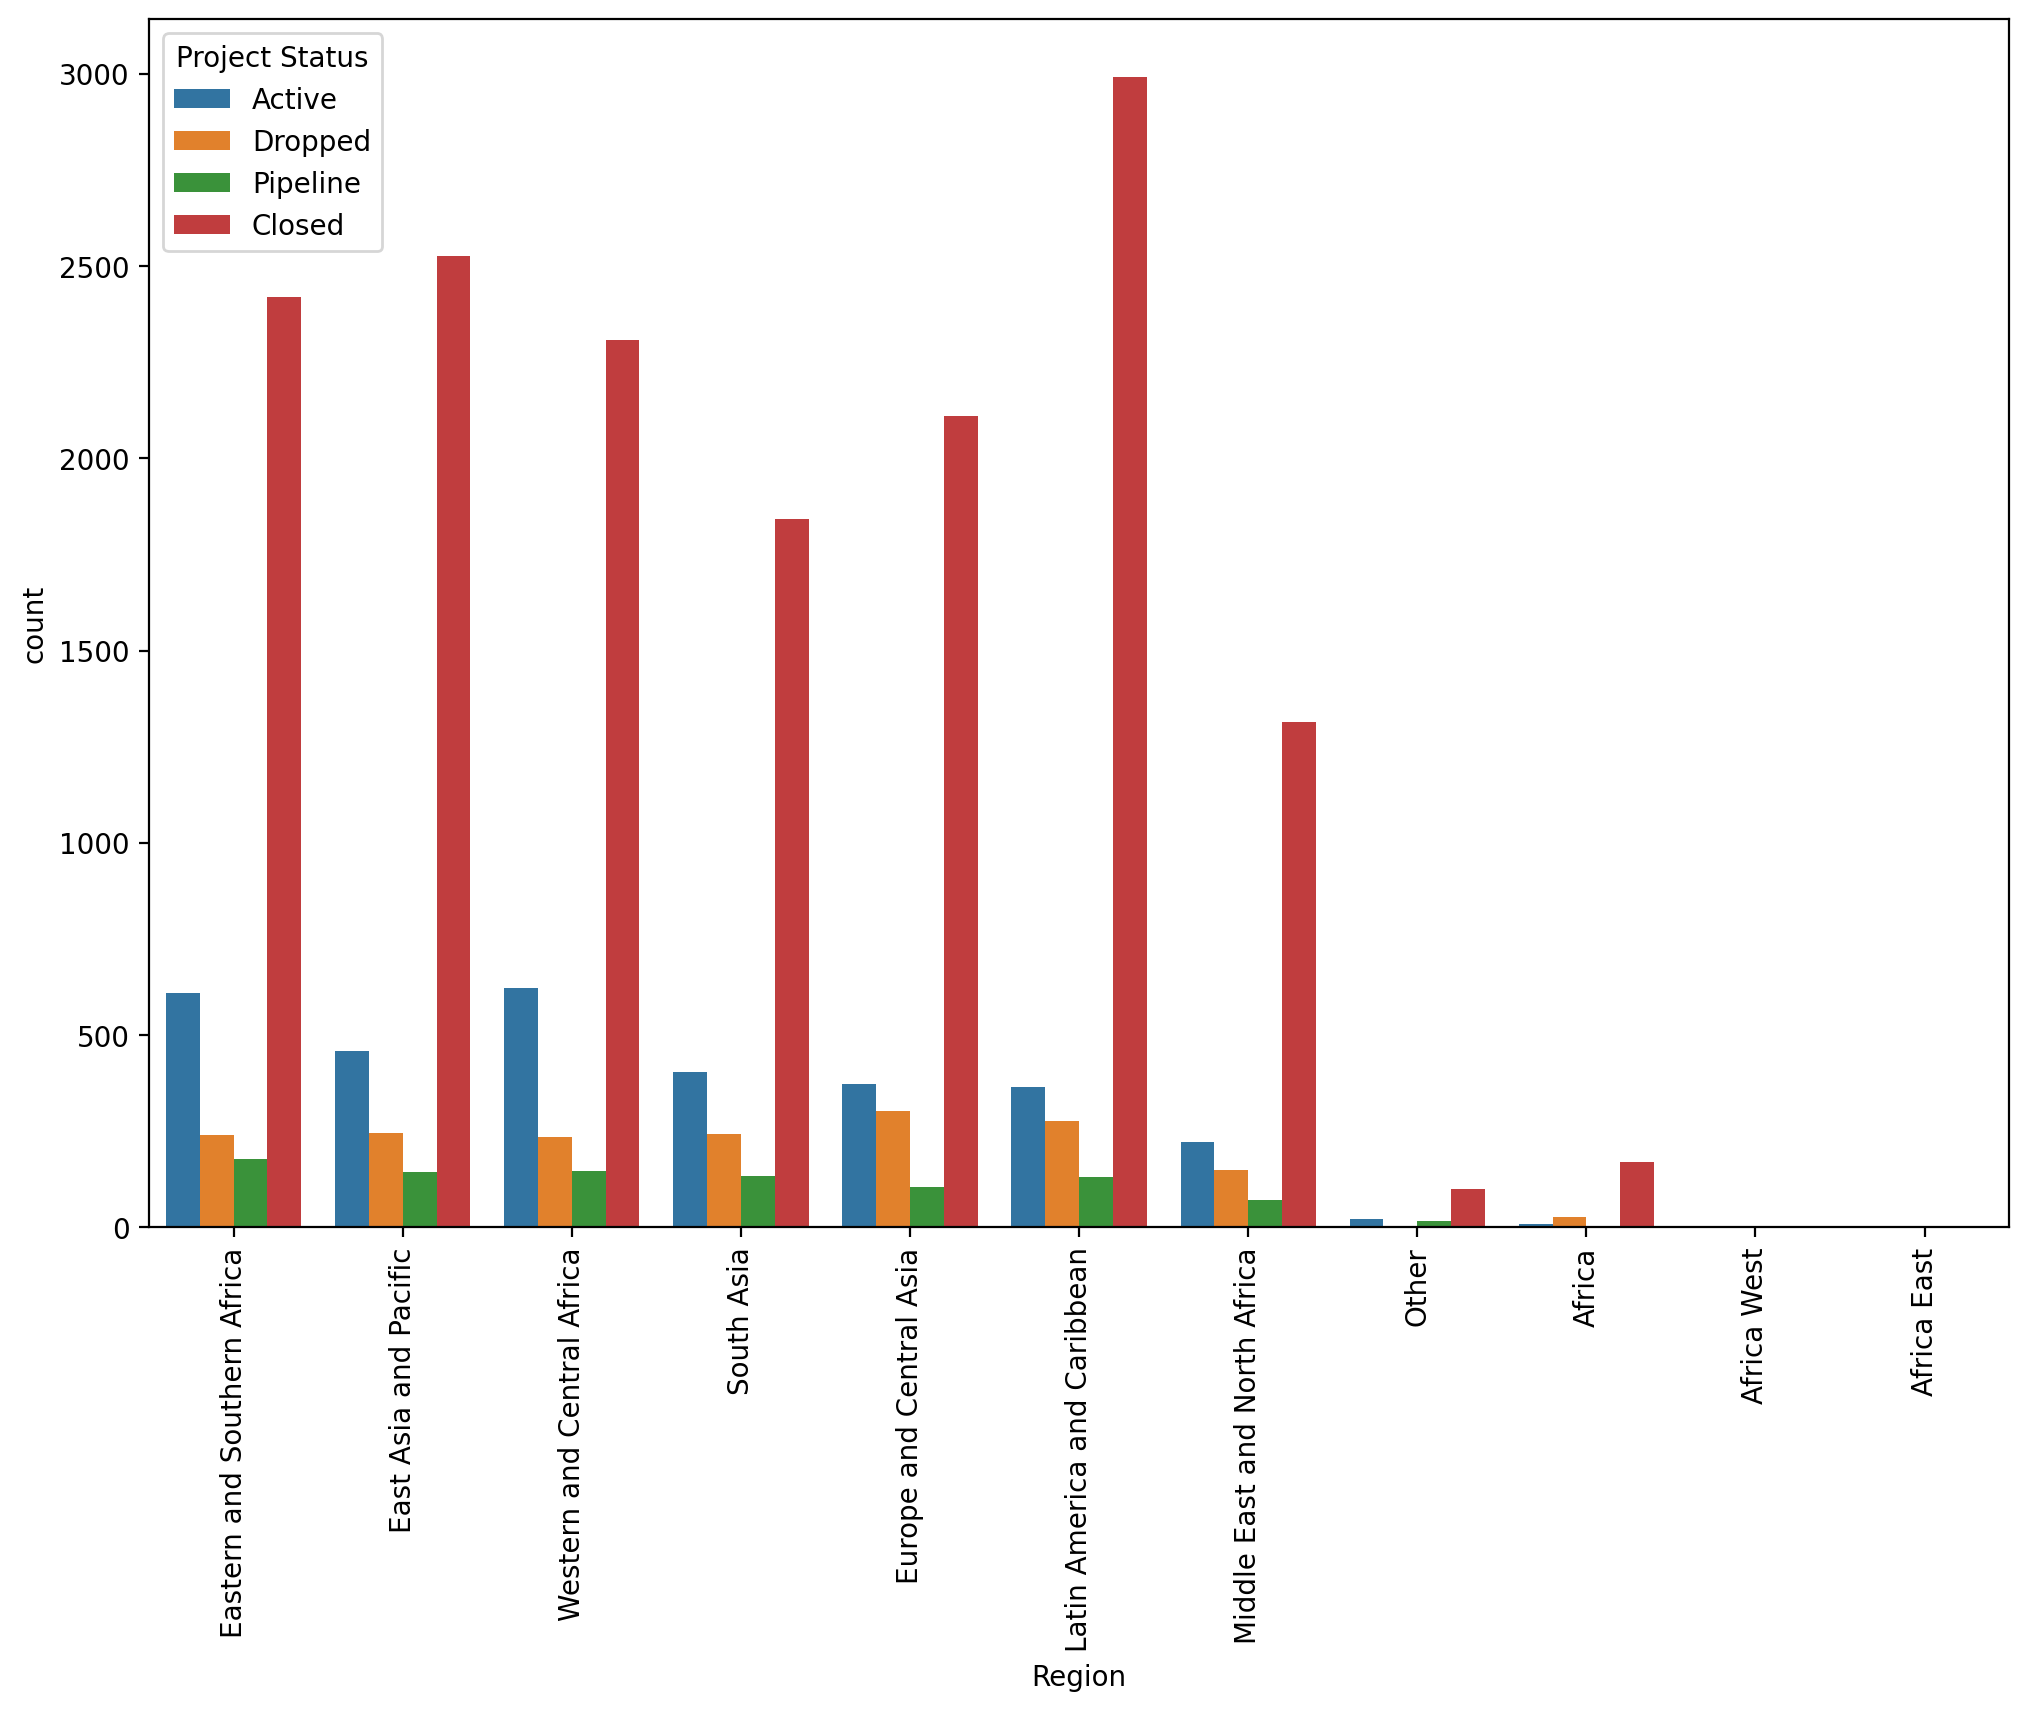

In [96]:
plt.figure(figsize=(12,8),dpi=200)
sns.countplot(x='Region',data=df,hue='Project Status')
plt.xticks(rotation=90)